# Short Assignment 1

This is an individual assignment.

**Due: Thursday, September 8 @ 11:59pm**

---
## Objectives

* Train a polynomial linear regression model
* Train an exponential regression model
* Utilize the train model/s to make predictions
* Evaluate model performance
* Make predictions and discuss results

---

# Question 1

In this assignment, you will be working with the "beer foam" dataset. 

* The [beer foam dataset](http://www.stat.ufl.edu/~winner/datasets.html) was collected by A. Leike and published in their work titled "Demonstration of the Exponential Decay Law Using Beer Froth" in 2002.

## Data Set Description

The data contains measurements of wet foam height and beer height at various time points for 3 brands of beer. The author of this data set fit an *exponential decay model* of the form $H(t) = H_0 e^{-\lambda t}$.

The data set is saved as a *.csv* file (**"beer_foam.csv"**) with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.

The file is organized in 4 columns:
1. Time from pour (in seconds)
2. Erdinger Weissbier foam height (in cm)
3. Augustinerbrau Munchen foam height (in cm)
4. Budweiser foam height (in cm)

Answer the following questions:

1. Load the data using ```pandas```.

For the rest of this assignment, consider the first 12 samples the training set, and the last 3 samples the test set.

2. Build and train a polynomial regression model for **each** bear brand with model order $M=3$.

3. Build and train an exponential model of the form $y=e^{(w_0+w_1x)}$ for **each** bear brand.

4. Predict the foam height for **each** beer brand for $t=450~$seconds after pour using the trained polynomial regression model (from problem 2) and exponential model (from problem 3).

5. Compare both models using plots (qualitative measure) and select a measure to assess the goodness-of-fit (quantitative measure). Based on these results and prediction for $t=450~$seconds for both models, discuss which performed best on this data.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
data_file = pd.read_csv('beer_foam.csv')

In [3]:
full_time_data = data_file['Time']
full_er_data = data_file['Erdinger']
full_au_data = data_file['Augustinerbrau']
full_bu_data = data_file['Budweiser']

In [4]:
er_train_data = data_file['Erdinger'][0:12]
au_train_data = data_file['Augustinerbrau'][0:12]
bu_train_data = data_file['Budweiser'][0:12]
time_train_data = data_file['Time'][0:12]

In [5]:
er_test_data = data_file['Erdinger'][12:]
au_test_data = data_file['Augustinerbrau'][12:]
bu_test_data = data_file['Budweiser'][12:]
time_test_data = data_file['Time'][12:]

Shorthand notations for beer brands:
1. Erdinger = Er
2. Augustinerbrau = Au
3. Budweiser = Bu

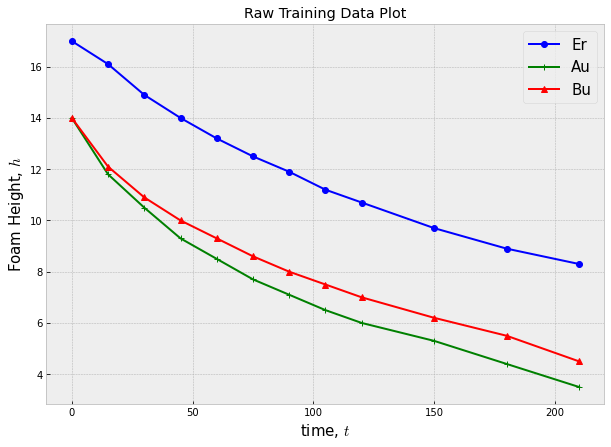

In [6]:
plt.figure(figsize = (10,7))
plt.plot(time_train_data, er_train_data, '-bo', label = 'Er')
plt.plot(time_train_data, au_train_data, '-g+', label = 'Au')
plt.plot(time_train_data, bu_train_data, '-r^', label = 'Bu')
plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Raw Training Data Plot");

---

### Create Polynomial Regression Model for each bear brand.

Time is x (or observation data) and foam height is t (or desired output)

In [7]:
def PolynomialRegression(time, height, M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([time**i for i in range(M+1)]).T
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T @ X) @ X.T @ height
    
    # Compute model prediction
    y = X @ w # output should be a Nx1 vector
    
    return w, y

In [8]:
# Model Order is given in the question
M = 3 # w should be a 4x1 when M=3
W_er, y_train_er = PolynomialRegression(time_train_data, er_train_data, M)
W_au, y_train_au = PolynomialRegression(time_train_data, au_train_data, M)
W_bu, y_train_bu = PolynomialRegression(time_train_data, bu_train_data, M)

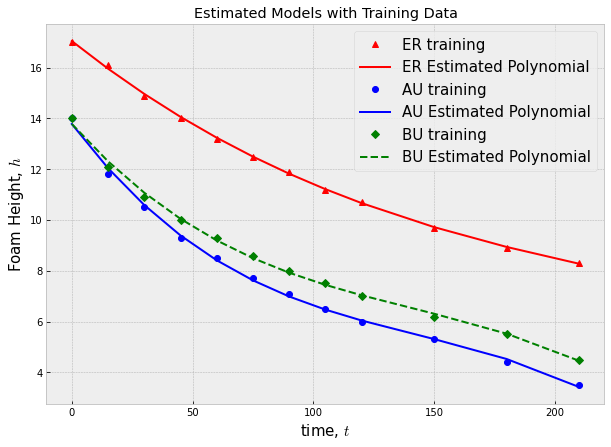

In [9]:
plt.figure(figsize = (10,7))
plt.plot(time_train_data, er_train_data, 'r^', label = 'ER training')
plt.plot(time_train_data, y_train_er, '-r', label = "ER Estimated Polynomial")

plt.plot(time_train_data, au_train_data, 'bo', label = 'AU training')
plt.plot(time_train_data, y_train_au, '-b', label = "AU Estimated Polynomial")

plt.plot(time_train_data, bu_train_data, 'gD', label = 'BU training')
plt.plot(time_train_data, y_train_bu, '--g', label = "BU Estimated Polynomial")

plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Estimated Models with Training Data");

The estimation models for AU and BU are closely following the training data and seem to be an over-fit

---

### Comparing the polynomial predection model with test data set

Working with the test data. Predict the test values using the estimated polynomial. So just multiply the weights with training time values and that should give out estimated foam heights. Then compare those estimated heights with the true recorded heights in test set.

In [10]:
# This is not computing the weights, instead it is getting the prediction outputs of beer foam height
def PolynomialRegression_test(time, M, weight):
    
    X = np.array([time**i for i in range(M+1)]).T
    
    y = X @ weight
    
    return y

In [11]:
# Predict foam height of different brands using the test time set
y_test_er = PolynomialRegression_test(time_test_data, M, W_er)
y_test_au = PolynomialRegression_test(time_test_data, M, W_au)
y_test_bu = PolynomialRegression_test(time_test_data, M, W_bu)

<IPython.core.display.Javascript object>


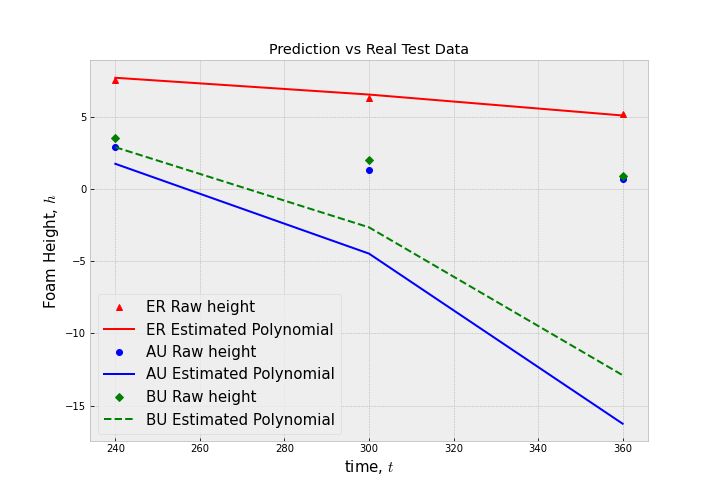

In [12]:
%matplotlib notebook

plt.figure(figsize = (10,7))
plt.plot(time_test_data, er_test_data, 'r^', label = 'ER Raw height')
plt.plot(time_test_data, y_test_er, '-r', label = "ER Estimated Polynomial")

plt.plot(time_test_data, au_test_data, 'bo', label = 'AU Raw height')
plt.plot(time_test_data, y_test_au, '-b', label = "AU Estimated Polynomial")

plt.plot(time_test_data, bu_test_data, 'gD', label = 'BU Raw height')
plt.plot(time_test_data, y_test_bu, '--g', label = "BU Estimated Polynomial")

plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Prediction vs Real Test Data");

From the above plot, it can be concluded that AU and BU are overfitting the training data and give poor predection in test data set

### Prediction at t = 450 seconds

In [13]:
y_450_er = PolynomialRegression_test(450, M, W_er)
y_450_au = PolynomialRegression_test(450, M, W_au)
y_450_bu = PolynomialRegression_test(450, M, W_bu)

In [14]:
newTime = full_time_data.to_numpy()
newTime = np.append(newTime, 450)
full_er_prediction = PolynomialRegression_test(newTime, M, W_er)
full_au_prediction = PolynomialRegression_test(newTime, M, W_au)
full_bu_prediction = PolynomialRegression_test(newTime, M, W_bu)

<IPython.core.display.Javascript object>


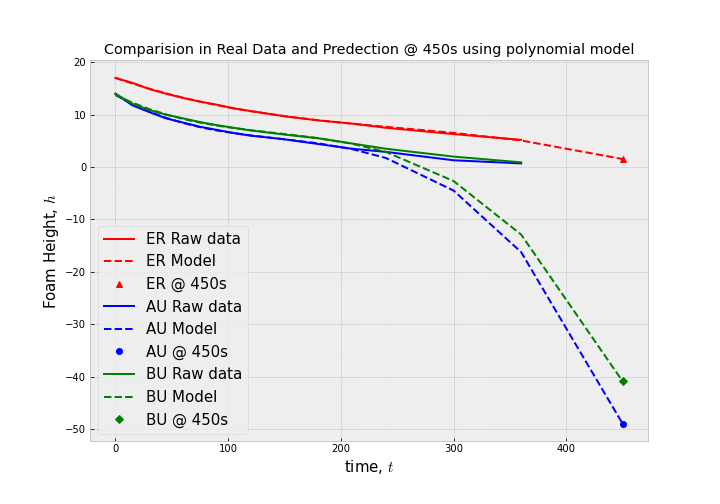

In [15]:
%matplotlib notebook

plt.figure(figsize = (10,7))
plt.plot(full_time_data, full_er_data, 'r', label = 'ER Raw data')
plt.plot(newTime, full_er_prediction, '--r', label = 'ER Model')
plt.plot(450, y_450_er, 'r^', label = "ER @ 450s")

plt.plot(full_time_data, full_au_data, 'b', label = 'AU Raw data')
plt.plot(newTime, full_au_prediction, '--b', label = 'AU Model')
plt.plot(450, y_450_au, 'bo', label = "AU @ 450s")

plt.plot(full_time_data, full_bu_data, 'g', label = 'BU Raw data')
plt.plot(newTime, full_bu_prediction, '--g', label = 'BU Model')
plt.plot(450, y_450_bu, 'gD', label = "BU @ 450s")

plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Comparision in Real Data and Predection @ 450s using polynomial model");

---

### Exponential Model

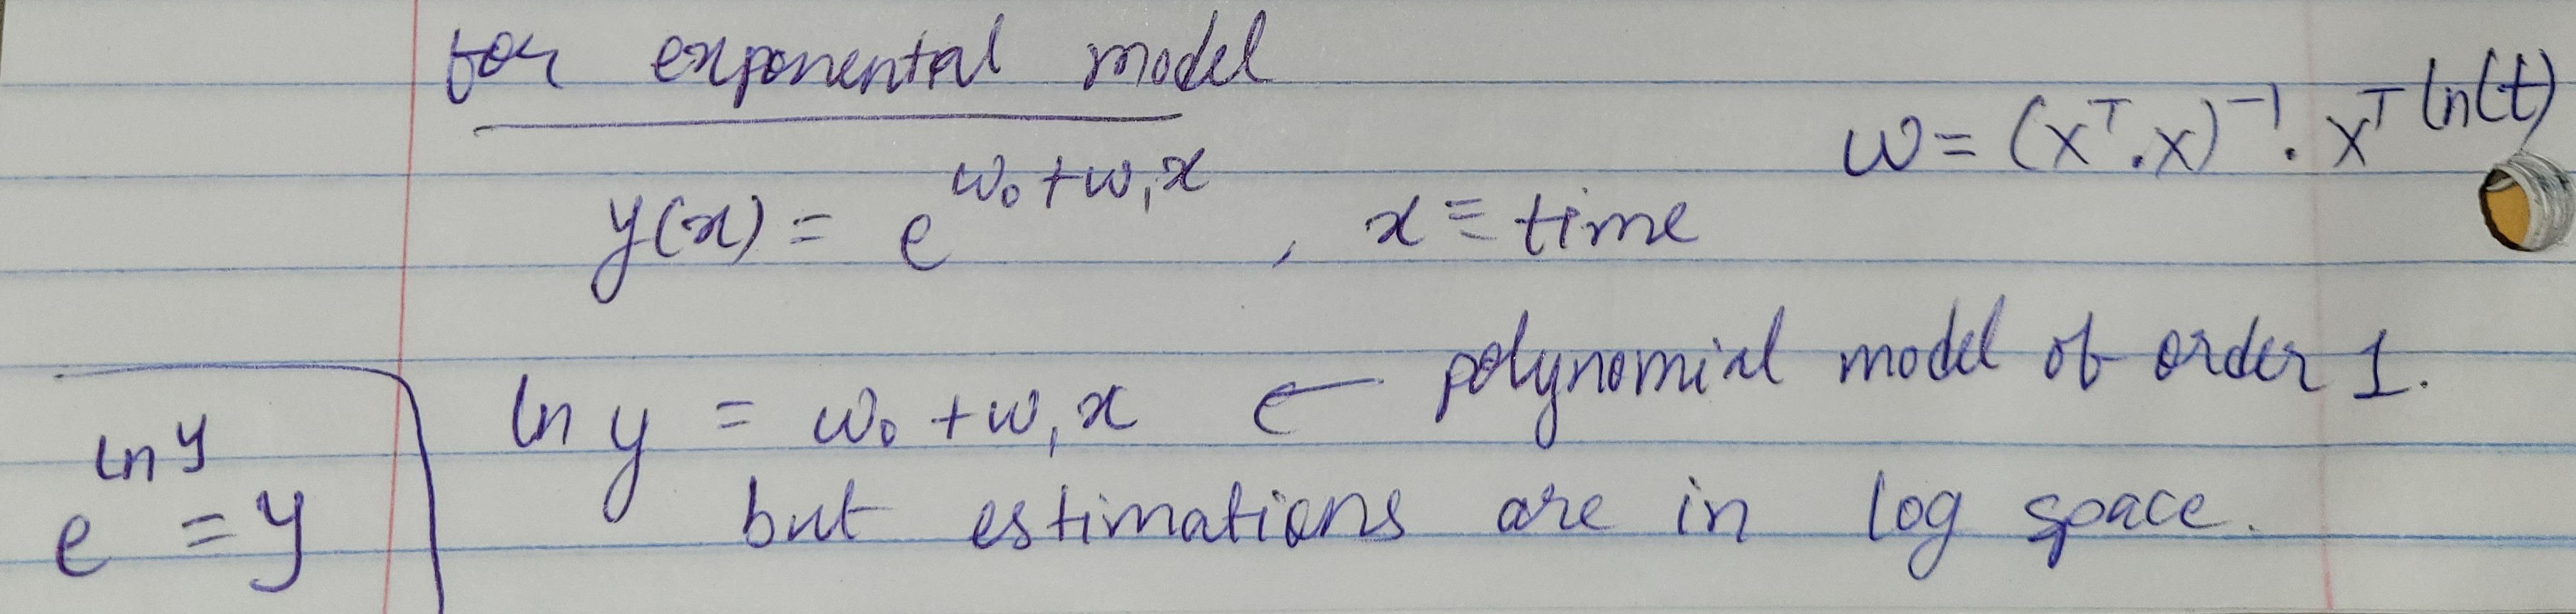

In [16]:
def ExponentialRegression(time, height, M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    ln_height = np.log(height)
    
    # Compute feature matrix X with polynomial features
    X = np.array([time**i for i in range(M+1)]).T
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T @ X) @ X.T @ ln_height
    
    # Compute model prediction
    y = X @ w # output should be a Nx1 vector
    
    e_y = np.exp(y)
    
    return w, e_y

In [17]:
# Model Order is given in the question
M = 1 # w should be a 2x1 when M=1
W_er_exp, y_train_er_exp = ExponentialRegression(time_train_data, er_train_data, M)
W_au_exp, y_train_au_exp = ExponentialRegression(time_train_data, au_train_data, M)
W_bu_exp, y_train_bu_exp = ExponentialRegression(time_train_data, bu_train_data, M)

<IPython.core.display.Javascript object>


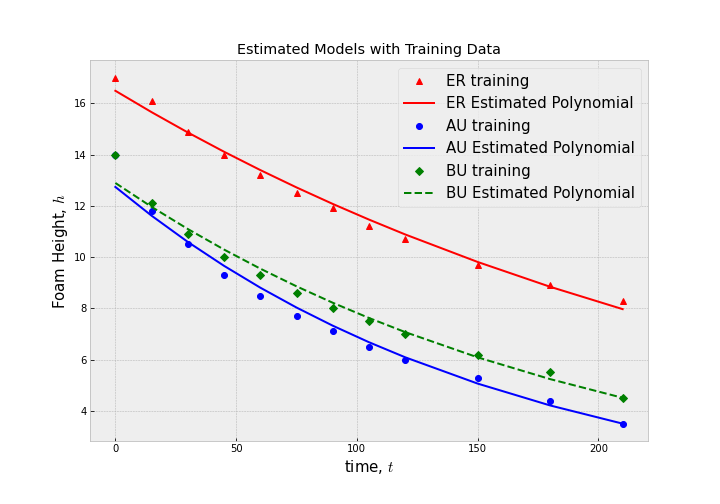

In [18]:
plt.figure(figsize = (10,7))
plt.plot(time_train_data, er_train_data, 'r^', label = 'ER training')
plt.plot(time_train_data, y_train_er_exp, '-r', label = "ER Estimated Polynomial")

plt.plot(time_train_data, au_train_data, 'bo', label = 'AU training')
plt.plot(time_train_data, y_train_au_exp, '-b', label = "AU Estimated Polynomial")

plt.plot(time_train_data, bu_train_data, 'gD', label = 'BU training')
plt.plot(time_train_data, y_train_bu_exp, '--g', label = "BU Estimated Polynomial")

plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Estimated Models with Training Data");

---

### Comparing the exponential predection model with test data set

Working with the test data. Predict the test values using the estimated polynomial. So just multiply the weights with training time values and that should give out estimated foam heights. Then compare those estimated heights with the true recorded heights in test set.

In [19]:
# This is not computing the weights, instead it is getting the prediction outputs of beer foam height
def ExponentialRegression_test(time, M, weight):
    
    
    X = np.array([time**i for i in range(M+1)]).T
    
    y = X @ weight
    
    e_y = np.exp(y)
    
    return e_y

In [20]:
# Predict foam height of different brands using the test time set
y_test_er_exp = ExponentialRegression_test(time_test_data, M, W_er_exp)
y_test_au_exp = ExponentialRegression_test(time_test_data, M, W_au_exp)
y_test_bu_exp = ExponentialRegression_test(time_test_data, M, W_bu_exp)

<IPython.core.display.Javascript object>


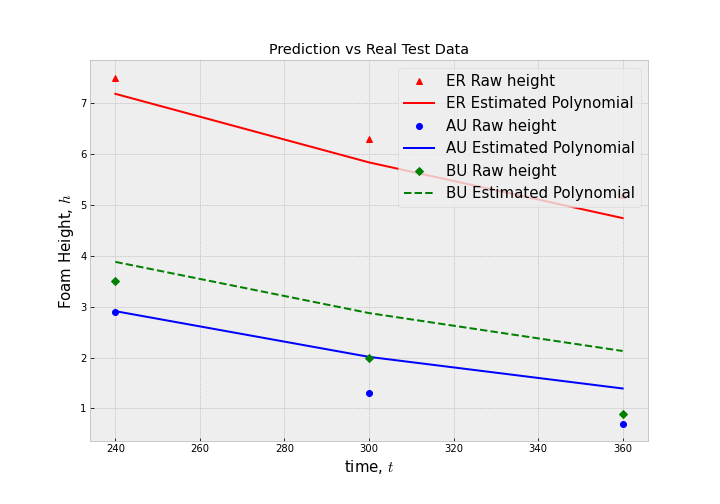

In [21]:
%matplotlib notebook

plt.figure(figsize = (10,7))
plt.plot(time_test_data, er_test_data, 'r^', label = 'ER Raw height')
plt.plot(time_test_data, y_test_er_exp, '-r', label = "ER Estimated Polynomial")

plt.plot(time_test_data, au_test_data, 'bo', label = 'AU Raw height')
plt.plot(time_test_data, y_test_au_exp, '-b', label = "AU Estimated Polynomial")

plt.plot(time_test_data, bu_test_data, 'gD', label = 'BU Raw height')
plt.plot(time_test_data, y_test_bu_exp, '--g', label = "BU Estimated Polynomial")

plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Prediction vs Real Test Data");

### Prediction at t = 450 seconds using exponential model

In [22]:
y_450_er_exp = ExponentialRegression_test(450, M, W_er_exp)
y_450_au_exp = ExponentialRegression_test(450, M, W_au_exp)
y_450_bu_exp = ExponentialRegression_test(450, M, W_bu_exp)

In [23]:
full_er_prediction_exp = ExponentialRegression_test(newTime, M, W_er_exp)
full_au_prediction_exp = ExponentialRegression_test(newTime, M, W_au_exp)
full_bu_prediction_exp = ExponentialRegression_test(newTime, M, W_bu_exp)

<IPython.core.display.Javascript object>


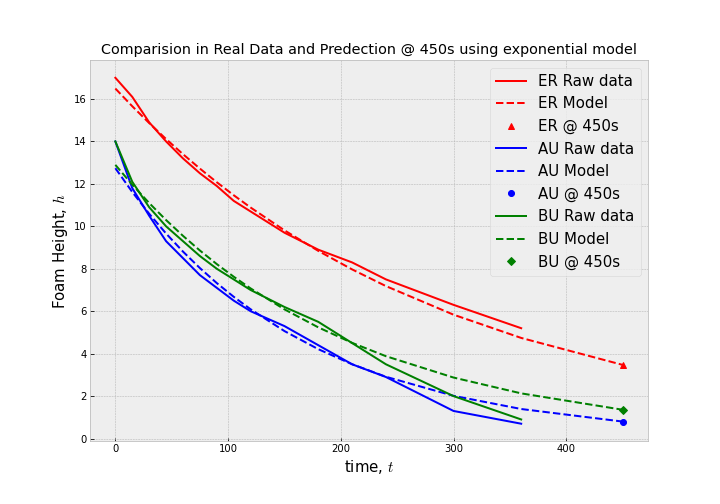

In [24]:
%matplotlib notebook

plt.figure(figsize = (10,7))
plt.plot(full_time_data, full_er_data, 'r', label = 'ER Raw data')
plt.plot(newTime, full_er_prediction_exp, '--r', label = 'ER Model')
plt.plot(450, y_450_er_exp, 'r^', label = "ER @ 450s")

plt.plot(full_time_data, full_au_data, 'b', label = 'AU Raw data')
plt.plot(newTime, full_au_prediction_exp, '--b', label = 'AU Model')
plt.plot(450, y_450_au_exp, 'bo', label = "AU @ 450s")

plt.plot(full_time_data, full_bu_data, 'g', label = 'BU Raw data')
plt.plot(newTime, full_bu_prediction_exp, '--g', label = 'BU Model')
plt.plot(450, y_450_bu_exp, 'gD', label = "BU @ 450s")

plt.legend(fontsize=15)
plt.xlabel('time, $t$',size=15)
plt.ylabel('Foam Height, $h$',size=15);
plt.title("Comparision in Real Data and Predection @ 450s using exponential model");

### Analysis: polynomial vs. exponential model

The exponential model is not too closely following the training data points and also giving a better prediction on test data compared to the polynomial regression model of order 3.

It can be observed in the above plot that prediction of beer foal height at 450 seconds using exponential model is providing a better estimation, whereas the prediction of polynomial model had signigicant deviation. 

---

# Question 2

Consider the noisy sinusoidal data we have been working with from lecture. 

Build a linear regression model with Gaussian basis functions as feature representations of the data. Consider the Gaussian basis functions:

\begin{align*}
\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2\sigma^2}\right\}
\end{align*}

where $\mu=\{0.1, 0.3, 0.6, 0.9\}$ for $j=1,2,3,4$, respectively, and a fixed standard deviation $\sigma=0.1$.

1. Train this model using the training set generated below.

2. Make predictions using the test set.

3. Provide a paragraph discussion about how you would determine how many Gaussian basis functions you would need and how would you determine the mean values $\mu_j$ and the bandwidth parameter $\sigma$.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

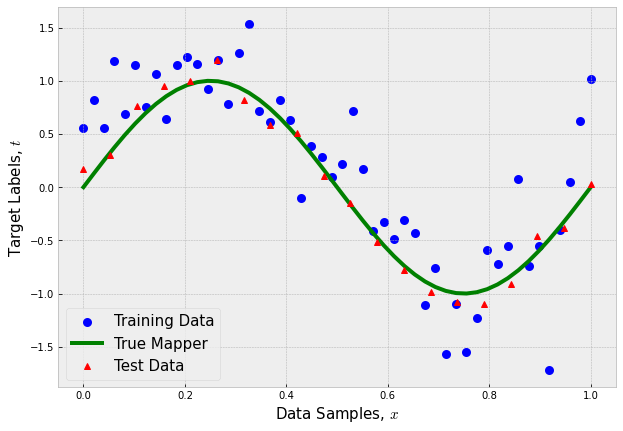

In [26]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

# Plotting
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [27]:
def LinearRegression_GaussianBasis(x,t):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    sig = 0.1
    mu = [0, 0.1,0.3,0.6,0.9]
    # Compute feature matrix X with polynomial features
    X = np.array([np.exp(-(x-i)**2/(2*sig**2)) for i in mu]).T # Gaussian Basis Functions
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t
    
    # Compute model prediction
    y = X@w # output should be a Nx1 vector
    
    return w, y

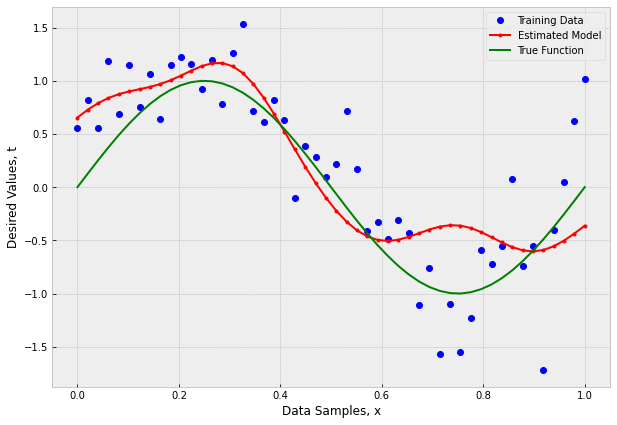

In [28]:
# Find the parameters that fit the noisy sinusoidal
w, y_train = LinearRegression_GaussianBasis(x_train, t_train) 

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Model')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

In [29]:
def LinearRegression_Gaussian_test(x, M, w):
    
    sig = 0.1
    mu = [0, 0.1,0.3,0.6,0.9]
    # Compute feature matrix X with polynomial features
    X = np.array([np.exp(-(x-i)**2/(2*sig**2)) for i in mu]).T # Gaussian Basis Functions    
    
    y = X@w
    
    return y

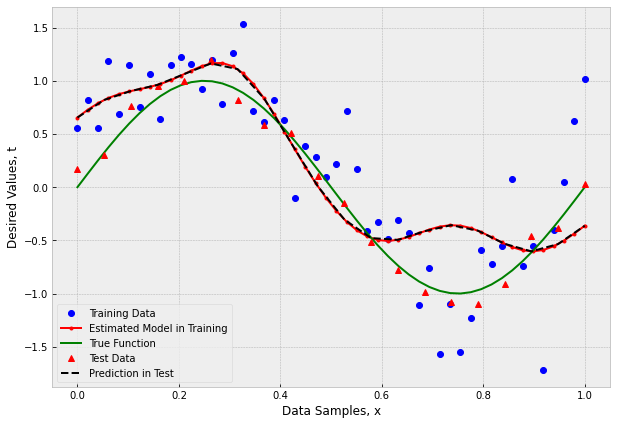

In [30]:
y_test = LinearRegression_Gaussian_test(x_test, M, w)

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Model in Training')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.plot(x_test,t_test,'r^', label = 'Test Data')
plt.plot(x_test,y_test,'--k', label = 'Prediction in Test')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

The model order (i.e., the number of Gaussian basis functions) and the mean values  ùúáùëó can be considered as hyperparameter. Cross-validation can be used to determine the best value of these hyperparamters using the training data.


___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___